In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [59]:
# Load dataset
df = pd.read_csv("C:\\Users\\91877\\Downloads\\DATa\\retail_sales_dataset.csv")

In [49]:
print(df.head())

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
521             522 2023-01-01     CUST522    Male   46           Beauty   
179             180 2023-01-01     CUST180    Male   41         Clothing   
558             559 2023-01-01     CUST559  Female   40         Clothing   
302             303 2023-01-02     CUST303    Male   19      Electronics   
978             979 2023-01-02     CUST979  Female   19           Beauty   

     Quantity  Price per Unit  Total Amount  
521         3             500          1500  
179         3             300           900  
558         4             300          1200  
302         3              30            90  
978         1              25            25  


In [61]:
df['Date'] = pd.to_datetime(df['Date'])  # Adjust column name if needed
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

In [65]:
print(df.columns)

Index(['Transaction ID', 'Customer ID', 'Gender', 'Age', 'Product Category',
       'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [75]:
df.columns = df.columns.str.strip().str.lower()

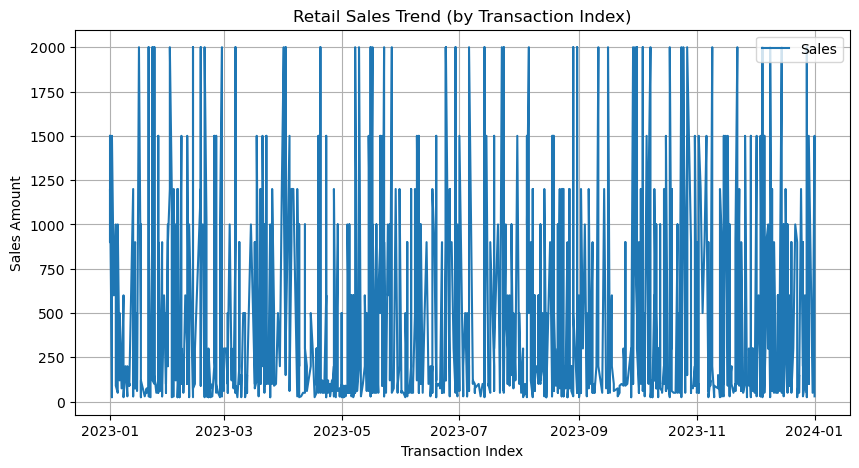

In [77]:
plt.figure(figsize=(10, 5))
plt.plot(df['total amount'], label='Sales')  # Not time-based, but transaction-based
plt.title('Retail Sales Trend (by Transaction Index)')
plt.xlabel('Transaction Index')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.legend()
plt.show()


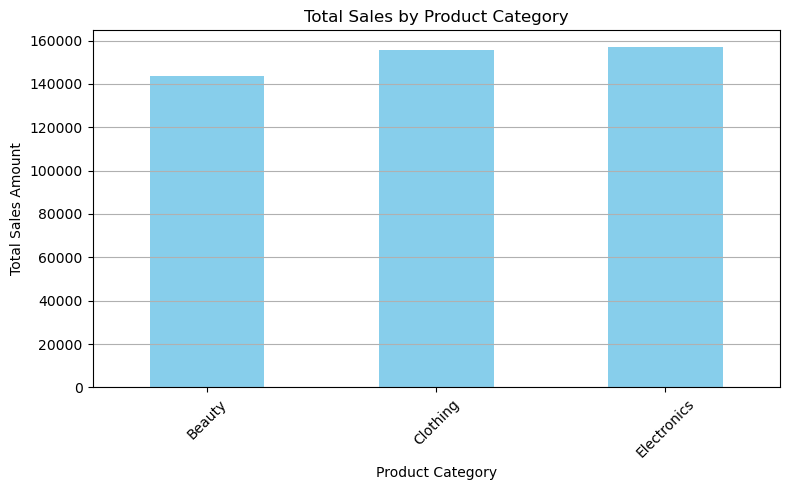

In [79]:
category_sales = df.groupby('product category')['total amount'].sum()

plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [83]:
train_size = int(len(df) * 0.8)
train, test = df['total amount'][:train_size], df['total amount'][train_size:]

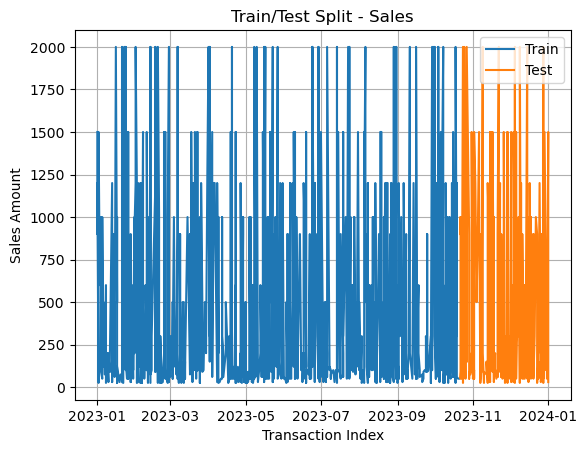

In [85]:
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.title("Train/Test Split - Sales")
plt.xlabel("Transaction Index")
plt.ylabel("Sales Amount")
plt.legend()
plt.grid(True)
plt.show()

In [93]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [103]:
from sklearn.metrics import mean_squared_error
import numpy as np

# If forecast exists and matches test length
if 'forecast' in locals() and len(forecast) == len(test):
    test = test.astype(float)
    forecast = forecast.astype(float)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    print(f"RMSE: {rmse:.2f}")
else:
    print("Forecast variable not defined or length mismatch.")

Forecast variable not defined or length mismatch.


In [105]:
print(test.head())

Date
2023-10-22     900.0
2023-10-22    1000.0
2023-10-22      50.0
2023-10-23     150.0
2023-10-23     500.0
Name: total amount, dtype: float64


In [109]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (try this exact one first)
try:
    model = ARIMA(train, order=(2, 1, 2))  # (p,d,q) — tweakable
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    print("✅ Model fitted and forecast generated successfully.")
except Exception as e:
    print("❌ Error fitting model:", e)


C:\Users\91877\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91877\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91877\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


✅ Model fitted and forecast generated successfully.


C:\Users\91877\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\91877\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [111]:
forecast = [train.iloc[-1]] * len(test)

from sklearn.metrics import mean_squared_error
import numpy as np

test = test.astype(float)
forecast = pd.Series(forecast, index=test.index)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"✅ RMSE with Naive Forecast: {rmse:.2f}")


✅ RMSE with Naive Forecast: 721.36


Columns: Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


17:07:00 - cmdstanpy - INFO - Chain [1] start processing
17:07:02 - cmdstanpy - INFO - Chain [1] done processing


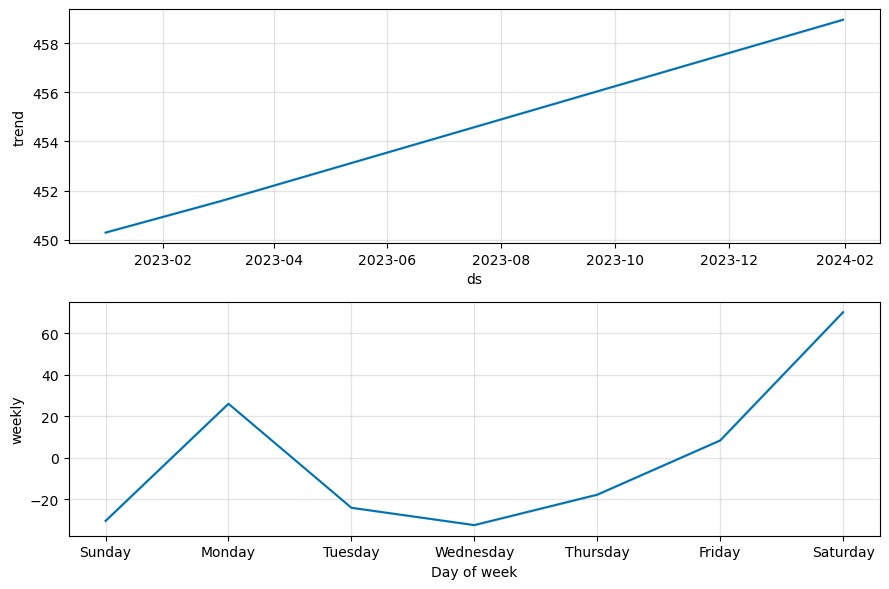

In [129]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Load your dataset
df = pd.read_csv("C:\\Users\\91877\\Downloads\\DATa\\retail_sales_dataset.csv")

# 2. Check the column names to be safe
print("Columns:", df.columns)

# 3. Rename to Prophet format
df_prophet = df.rename(columns={'Date': 'ds', 'Total Amount': 'y'})

# 4. Ensure 'ds' is datetime
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# 5. Drop NaNs (if any)
df_prophet = df_prophet.dropna(subset=['ds', 'y'])

# 6. Initialize and fit the model
model = Prophet()
model.fit(df_prophet)

# 7. Create future dataframe (e.g., next 30 days)
future = model.make_future_dataframe(periods=30)

# 8. Predict
forecast = model.predict(future)

# 9. Plot forecast components
fig = model.plot_components(forecast)
plt.tight_layout()
plt.show()
